# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
#X, y = mnist['data'], mnist['target']

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist['data']
y = mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
#70000 rows and 784 columns or values
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
y[35999]

'0'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

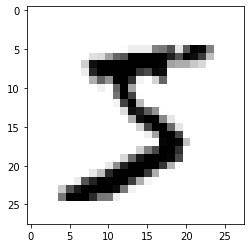

In [4]:
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(X[0,:].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

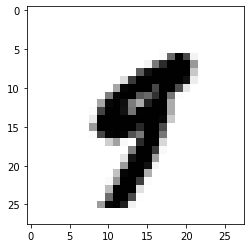

In [5]:
plt.imshow(X[36000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [20]:
#y value what it should be and x value is the image
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.model_selection import train_test_split

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [21]:
#use X_train and X_test to fit the model

y5=np.where(y=='5', 1, 0)
y5_train = y5[:60000]
y5_test = y5[60000:]
print(X_train.shape,y5_train.shape, X_test.shape, y5_test.shape)

#The code can also be written as so:
#y5_train = np.where(y_train=='5', 1, 0)
#y5_test = np.where(y_test=='5', 1, 0)

(60000, 784) (60000,) (10000, 784) (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [22]:
from sklearn.linear_model import LogisticRegression

fives_model = LogisticRegression().fit(X_train, y5_train)

#This can be written in two steps also:
#fives_model=LogisticRegression()
#fives_model.fit(X_train, y5_train)

/Users/Veeka/.pyenv/versions/3.7.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Does the classifier predict correctly the 36000th digit we picked before?

In [25]:
#The classifier did not correctly predicted the 36000th digit (which is '0')
pred = fives_model.predict(X)
print(pred[36000])

actual_num = y[35999]
actual_num

0


'0'

In [30]:
y_pred = fives_model.predict(X_test)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [27]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [28]:
never_5_clf.fit(X_train, y5_train)
never5_pred = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [41]:
#logistic regression
y_pred = fives_model.predict(X_test)
print('Confusion Matrix for the Logistic Regresson')
print(confusion_matrix(y_true=y5_test, y_pred=y_pred))
#ratio: tp / (tp + fp), precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
print('Precision', precision_score(y_true=y5_test, y_pred=y_pred))
#ratio: tp / (tp + fn), recall is intuitively the ability of the classifier to find all the positive samples.
print('Recall', recall_score(y_true=y5_test, y_pred=y_pred))
#balanced F-score or F-measure, F1 score can be interpreted as a weighted average of the precision and recall.
print('F-Score', f1_score(y_true=y5_test, y_pred=y_pred))

Confusion Matrix for the Logistic Regresson
[[9034   74]
 [ 147  745]]
Precision 0.9096459096459096
Recall 0.8352017937219731
F-Score 0.8708357685563999


In [44]:
#never 5
y_pred = fives_model.predict(X_test)
print('Confusion Matrix for the Never 5')
print(confusion_matrix(y_true=y5_test, y_pred=never5_pred))
print('Precision', precision_score(y_true=y5_test, y_pred=never5_pred))
print('Recall', recall_score(y_true=y5_test, y_pred=never5_pred))
print('F-Score', f1_score(y_true=y5_test, y_pred=never5_pred))

Confusion Matrix for the Never 5
[[9108    0]
 [ 892    0]]
Precision 0.0
Recall 0.0
F-Score 0.0


/Users/Veeka/.pyenv/versions/3.7.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#The biggest difference is the confusion matrix. On th 2nd one (never 5) we see that there are no TN nor FP
#We would choose the first one
#F-Score is higher on the first one, so more reliable.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [46]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

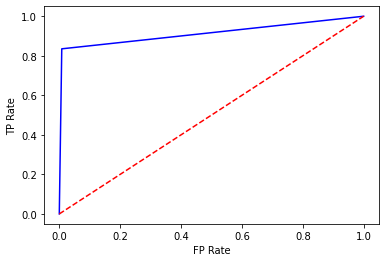

In [47]:
#logistic regression
fpr, tpr, threshold = roc_curve (y5_test, y_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

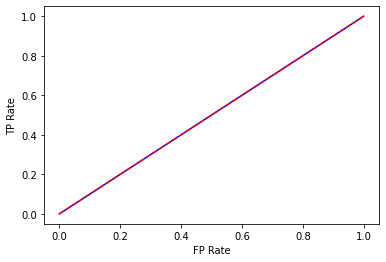

In [48]:
#never 5
fpr, tpr, threshold = roc_curve (y5_test, never5_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [49]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_score = roc_auc_score(y5_test, y_pred)
print('AUC Score for Logistic Regression', roc_score)

AUC Score for Logistic Regression 0.9135385341029717


In [52]:
roc_score_n5 = roc_auc_score(y5_test, never5_pred)
print('AUC Score for Never 5 Classifier', roc_score_n5)

AUC Score for Never 5 Classifier 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#Go with the first one, the second one is guessing